Adrian Gruszczynski / Yann Salimi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class DNN:
    def __init__(self, nn_in, nn_hidden, nn_out, n_layers, alpha):
        self.nn_in = nn_in
        self.nn_hidden = nn_hidden
        self.nn_out = nn_out
        self.alpha = alpha
        self.n_layers = n_layers
        self.W = None   # weights
        self.B = None   # biases

    @staticmethod
    def softmax(x):
        exps = np.exp(x - np.max(x))
        return exps / np.sum(exps)

    @staticmethod
    def relu(x):
        return x * (x > 0)

    @staticmethod
    def relu_derivative(z):
        return np.greater(z, 0).astype(int)
    
    def init_weights(self):
        W = []
        B = []
        nn_in = self.nn_in
        nn_hidden = self.nn_hidden
        nn_out = self.nn_out
        for i in range(self.n_layers):
            W.append(np.random.normal(0, .001, size=(nn_in, nn_hidden)))
            B.append(np.zeros((1, nn_hidden)))
            nn_in = nn_hidden
        W.append(np.random.normal(0, .001, size=(nn_in, nn_out)))
        B.append(np.zeros((1, nn_out)))
        self.W = np.array(W)
        self.B = B

    def feed_forward(self, X):
        A, Z = [], []
        A.append(X)
        for j in range(self.n_layers):
            Z.append(A[j] @ self.W[j] + self.B[j])
            A.append(self.relu(Z[j]))
        Z.append(A[-1] @ self.W[-1] + self.B[-1])
        return A, Z

    def feed_backward(self, A, delta):
        D, B = [], []
        for j in range(len(self.W)):
            a = A[-1 - j]
            dW = a.T @ delta
            dB = np.sum(delta, axis=0)
            D.append(dW)
            B.append(dB)
            delta = delta @ self.W[-1 - j].T * self.relu_derivative(a)
        return D, B
    
    def update_weights(self, D, B):
        for j in range(len(self.W)):
            self.W[j] += - self.alpha * np.array(D[-1 - j])
            self.B[j] += - self.alpha * np.array(B[-1 - j])

    def fit(self, X, y, n_epochs):
        fig, (ax1, ax2) = plt.subplots(2, 1)
        for i in range(n_epochs):
            A, Z = self.feed_forward(X)
            probs = self.softmax(Z[-1])
            delta = self.delta_cross_entropy(probs, y)
            D, B = self.feed_backward(A, delta)
            self.update_weights(D, B)
            loss = self.cross_entropy(Z[-1], y)
            y_pred = np.argmax(probs, axis=1)
            accuracy = 100 * accuracy_score(y, y_pred)
            plot(i, loss, accuracy, ax1, ax2)
        plt.show()

    def predict(self, x):
        A, Z = self.feed_forward(x)
        probs = self.softmax(Z[-1])
        return np.argmax(probs, axis=1)
    
    def cross_entropy(self, X, y):
        m = y.shape[0]
        p = self.softmax(X)
        log_likelihood = -np.log(p[range(m), y])
        loss = np.sum(log_likelihood) / m
        return loss

    def delta_cross_entropy(self, X, y):
        m = y.shape[0]
        grad = self.softmax(X)
        grad[range(m), y] -= 1
        grad = grad / m
        return grad

def plot(i, x, y, ax1, ax2):
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('No. iterations')
    ax2.set_ylabel('Train accuracy')
    ax2.set_xlabel('No. iterations')
    ax1.scatter(i, x, c='b')
    ax2.scatter(i, y, c='y')


def accuracy_score(y_true, y_pred):
    if y_true.shape != y_pred.shape:
        raise ValueError('array shapes do not match')
    return np.sum(np.equal(y_true, y_pred)) / len(y_true)

In [7]:
train = np.loadtxt('zip.train')
test = np.loadtxt('zip.test')

X_train = train[:, 1:]
y_train = train[:, 0].astype(np.int8)

X_val = test[:, 1:]
y_val = test[:, 0]

## Vary the number of hidden layers and neurons to optimize the accuracy

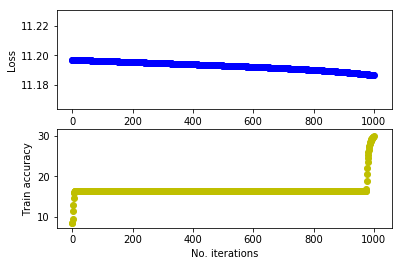

In [19]:
dnn = DNN(X_train.shape[1], 100, 10, 1, .001)

dnn.init_weights()
dnn.fit(X_train, y_train, 1000)

In [21]:
y_pred = np.empty(y_val.shape)
for i in range(len(X_val)):
    y_pred[i] = dnn.predict(X_val[i])

accuracy = 100 * accuracy_score(y_val, y_pred)
print('val accuracy: %.2f%%' % accuracy)

val accuracy: 30.24%


We achived best results with 100 hidden units and 1 hidden layer so far. Apparently varying the number of hidden layers causes the gradient to dissapear. An other possible cause for that would be an incorrect gradient update. Unfortunately we weren't able to find the cause before the deadline.

## Plot some of the numbers that are still not classified correctly.

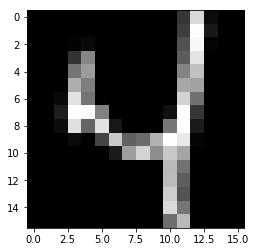

In [25]:
idx = np.not_equal(y_pred, y_val)
true_neg = X_val[idx]

plt.imshow(true_neg[np.random.randint(0,true_neg.shape[0])].reshape(16,16), cmap='gray')


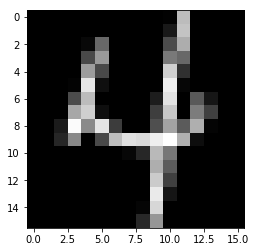

In [26]:
plt.imshow(true_neg[np.random.randint(0,true_neg.shape[0])].reshape(16,16), cmap='gray')

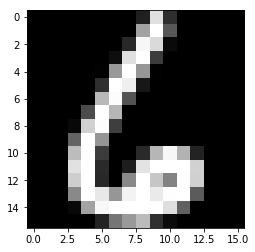

In [27]:
plt.imshow(true_neg[np.random.randint(0,true_neg.shape[0])].reshape(16,16), cmap='gray')